# Praktikum 1

### KMeans Clustering — Dataset Iris

Pada modul ini kita akan mempraktikkan pembuatan model KMeans menggunakan dataset **Iris.csv**.

In [1]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Seleksi Fitur

In [2]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Plot Data (Sepal Length vs Sepal Width)

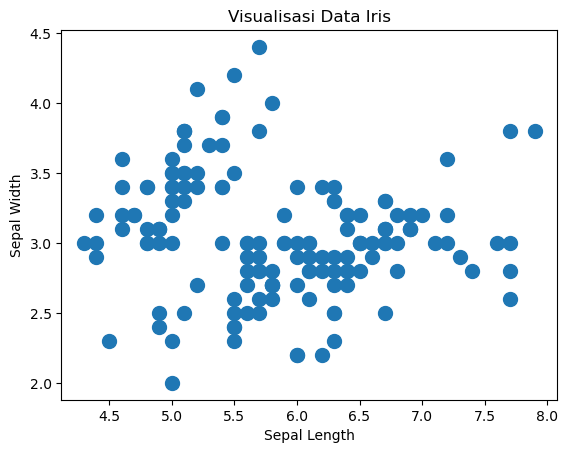

In [3]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Visualisasi Data Iris')
plt.show()

### Buat Model KMeans — k = 2

In [4]:
cl_kmeans = KMeans(n_clusters=2)
y_kmeans = cl_kmeans.fit_predict(X)

c:\Users\broto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Plot Hasil Cluster + Centroid

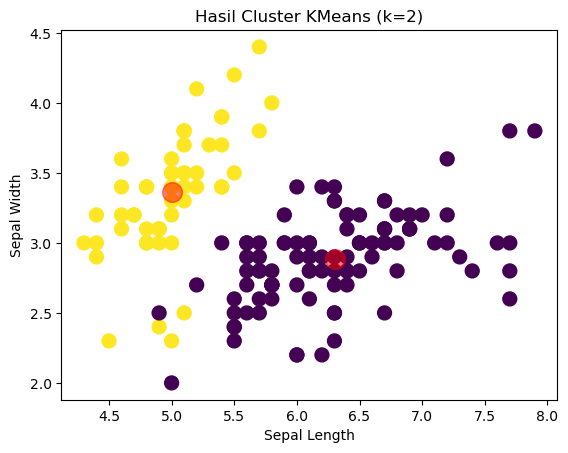

In [5]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Hasil Cluster KMeans (k=2)')
plt.show()

### Nilai SSE (Sum of Squared Errors)

In [6]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


### Metode Elbow — Menentukan k Terbaik

c:\Users\broto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\broto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\broto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\broto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

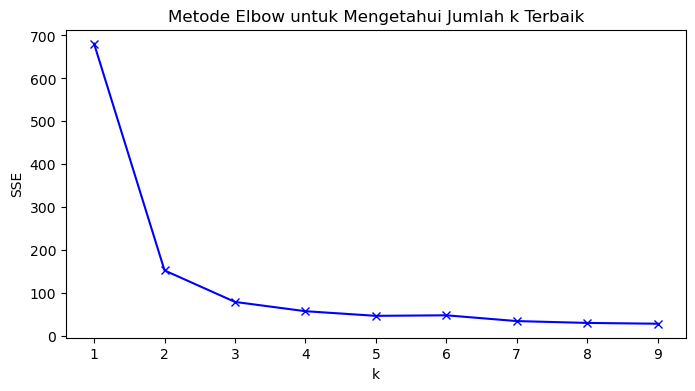

In [7]:
sse = []
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Mengetahui Jumlah k Terbaik')
plt.show()

### Nilai SSE setiap k

In [8]:
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8244000000001
k=2; SSE=152.36870647733906
k=3; SSE=78.94084142614601
k=4; SSE=57.31787321428571
k=5; SSE=46.53558205128205
k=6; SSE=47.754158979780634
k=7; SSE=34.299985543844244
k=8; SSE=30.01114102564103
k=9; SSE=28.15246635382162
